In [1]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.6 MB/s eta 0:00:00


In [3]:
pip install surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=c2975238426586f6fe1696c62d8797158e8cd9fea7263fa27ade7da34523f3e0
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [77]:
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from surprise import Dataset, Reader, KNNBasic
from sklearn.model_selection import train_test_split

from surprise import accuracy, Dataset, SVD
from surprise.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import dmba

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Problem1- Principle Component Analysis**

In [72]:
br_data = pd.read_csv('breast-cancer.csv')
br_data.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
print(br_data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# Indexing
br_data.set_index('id', inplace=True)
br_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [75]:
# Data Preprocessing
br_data['diagnosis'] = br_data['diagnosis'].astype('category').cat.codes
br_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


## **ELbow Method**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


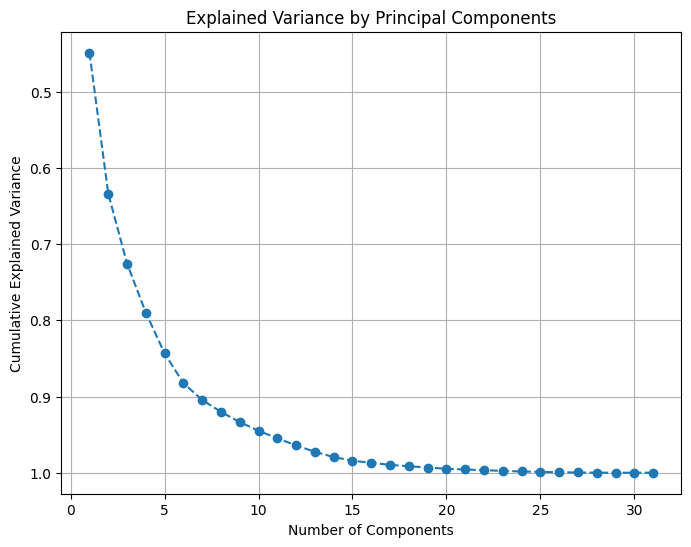

In [113]:
X = br_data.iloc[:, :]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_nocomplimit = PCA()
pca_nocomplimit.fit(X_scaled)

explained_variance_ratio_pca = pca_nocomplimit.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio_pca.cumsum()
# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_pca)+1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

# After analyzing the plot, choose the optimal number of components
number_of_components = 6


In [116]:
number_of_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

print(f"Number of PCs to capture at least 80% variance: {number_of_components}")
print(f"Total proportion of variance captured: {cumulative_variance_ratio[number_of_components-1]}")

Number of PCs to capture at least 80% variance: 6
Total proportion of variance captured: 0.8824491039657136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Scale and preprocess the data
#X = br_data.drop(columns=['diagnosis'])
#y = br_data['diagnosis']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(br_data)
print(scaled_data)

[[ 1.29767572  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.29767572  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.29767572  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 1.29767572  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.29767572  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.77060855 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
number_of_components = 6
pcs = PCA(number_of_components)
pcs_fit = pcs.fit_transform(scaled_data)
print(pcs_fit)

[[ 9.22577011  2.11619563 -0.94810915 -3.69577776  1.2562796   1.4191174 ]
 [ 2.6558016  -3.78477586 -0.50282496 -1.12393838 -0.55110723  0.01927257]
 [ 5.89249212 -1.00557896 -0.48714898 -0.94248621  0.19171051  0.54133241]
 ...
 [ 1.53007727 -1.95887147  0.46571815  2.10448112 -1.82011268 -0.54601509]
 [10.40500789  1.84907792 -1.77932757  2.16346338 -0.20160896  0.59163112]
 [-5.50486158 -0.76634841  1.36862306  2.38604952  0.14075436  1.61771263]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
import numpy as np

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC'+str(i) for i in range(1,number_of_components+1)]
pcsSummary.round(4)

# Q1 1. Using PCA, how many PCs do you think are appropriate to be used for prediction? What is the total proportion of variance they capture?

#SOLUTION:

#By Increasing the number of principal components from 2 to 6, the variability of data increases from 0.63% to 88%

#A total of 6 PCs are appropriate to be used for prediction.

#The total proportion of variance they capture is “88%”

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,PC5,PC6
Standard deviation,3.7339,2.3951,1.6887,1.4149,1.2892,1.0998
Proportion of variance,0.4490,0.1847,0.0918,0.0645,0.0535,0.0390
Cumulative proportion,0.4490,0.6337,0.7255,0.7900,0.8435,0.8824


In [119]:
# Transform the scaled data and Create a DataFrame for PCs

pc_columns = [f'PC{i+1}' for i in range(pcs_fit.shape[1])]  # PC1, PC2, ...
pcs_df = pd.DataFrame(pcs_fit, columns=pc_columns)
pcs_df['diagnosis'] = br_data['diagnosis'].values
pcs_df

# Q1 2.1 Using the PCs you generate and the outcome variable “diagnosis,” follow the four below steps. Report the model outputs (confusion metrics) and compare the overall accuracy of all the individual and ensemble models.
#1. Create a data frame with the PCs you generate and the “diagnosis” column. Partition the data with 60% training and 40% validation.
#SOLUTION: train_df,test_df= train_test_split(pcs_df,test_size=0.4, random_state=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,PC5,PC6,diagnosis
0,9.225770,2.116196,-0.948109,-3.695778,1.256280,1.419117,1
1,2.655802,-3.784776,-0.502825,-1.123938,-0.551107,0.019273,1
2,5.892492,-1.005579,-0.487149,-0.942486,0.191711,0.541332,1
3,7.135401,10.318716,-3.339501,-0.085947,2.938456,3.062748,1
4,4.129423,-1.905579,1.454000,-2.880175,-0.365289,-1.243428,1
...,...,...,...,...,...,...,...
564,6.593983,-3.454947,2.570876,-1.152905,0.129841,-2.377277,1
565,4.024833,-3.556006,2.047373,2.568539,0.434088,-0.243029,1
566,1.530077,-1.958871,0.465718,2.104481,-1.820113,-0.546015,1
567,10.405008,1.849078,-1.779328,2.163463,-0.201609,0.591631,1


In [120]:
train_df,test_df= train_test_split(pcs_df,test_size=0.4, random_state=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
train_x = train_df.drop(columns='diagnosis')
train_y = train_df['diagnosis']
test_x = test_df.drop(columns='diagnosis')
test_y = test_df['diagnosis']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Logistic Regression Model for PCA**

In [122]:
#Q1 2.2. Fit models to the data for (1) logistic regression, (2) Naïve Bayes, and (3) random forest.

#(1) logistic regression

logit_mod = LogisticRegression()
logit_mod.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression()

In [123]:
pred_y = logit_mod.predict(test_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
conf_matrix = confusion_matrix(test_y,pred_y)
Class_report = classification_report(test_y,pred_y)
accuracy = accuracy_score(test_y,pred_y)
print(f"Confustion Matrix for logit is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit is : \n\n {accuracy}\n")

Confustion Matrix for logit is: 

 [[147   1]
 [  2  78]]

Classification Report for logit is:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.97      0.98        80

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228


Accuracy Score for logit is : 

 0.9868421052631579



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Naive Model for PCA**

In [99]:
# (2) Naïve Bayes
from sklearn.naive_bayes import GaussianNB




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
nb_mod = GaussianNB()
nb_mod.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GaussianNB()

In [101]:
y_pred = nb_mod.predict(test_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
conf_matrix = confusion_matrix(test_y,y_pred)
Class_report = classification_report(test_y,y_pred)
accuracy = accuracy_score(test_y,y_pred)
print(f"Confustion Matrix for Navive bayes is: \n\n {conf_matrix}\n")
print(f"Classification Report for Navive bayes is:\n\n {Class_report}\n")
print(f"Accuracy Score for Navive bayes is : \n\n {accuracy}\n")

Confustion Matrix for Navive bayes is: 

 [[144   4]
 [  8  72]]

Classification Report for Navive bayes is:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       148
           1       0.95      0.90      0.92        80

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228


Accuracy Score for Navive bayes is : 

 0.9473684210526315



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Random Forest Model For PCA**

In [103]:
# (3) random forest
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
random_mod = RandomForestClassifier()
random_mod.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier()

In [106]:
predY = random_mod.predict(test_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
conf_matrix = confusion_matrix(test_y,predY)
Class_report = classification_report(test_y,predY)
accuracy = accuracy_score(test_y,predY)
print(f"Confustion Matrix for Random Forest is: \n\n {conf_matrix}\n")
print(f"Classification Report for Random Forest is:\n\n {Class_report}\n")
print(f"Accuracy Score for Random Forest is : \n\n {accuracy}\n")

Confustion Matrix for Random Forest is: 

 [[146   2]
 [  1  79]]

Classification Report for Random Forest is:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.99      0.98        80

    accuracy                           0.99       228
   macro avg       0.98      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228


Accuracy Score for Random Forest is : 

 0.9868421052631579



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Problem 2: Association Rules**

In [126]:
# Problem 2: Association Rules
# 14.2 Identifying Course Combinations. The Institute for Statistics Education at Statistics.com offers online courses in statistics and analytics,
# and it is seeking information that will help in packaging and sequencing courses. Consider the data in the file Course-Topics.csv,
# the first few rows of which are shown in Table 14.14. These data are for purchases of online statistics courses at Statistics.com.
# Each row represents the courses attended by a single customer. The firm wishes to assess alternative sequencings and bundling of courses.
# Use association rules to analyze these data and interpret several of the resulting rules.

course_data = dmba.load_data('Coursetopics.csv')
course_data_df = pd.DataFrame(course_data)
course_data_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Intro,DataMining,Survey,Cat Data,Regression,Forecast,DOE,SW
0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,1,1,0,0,1
3,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
360,0,0,0,1,0,0,0,0
361,0,1,0,1,0,0,0,1
362,0,0,0,0,0,0,0,1
363,0,0,0,1,0,0,0,0


In [127]:
course_data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Intro,0
DataMining,0
Survey,0
Cat Data,0
Regression,0
Forecast,0
DOE,0
SW,0


In [128]:
course_data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Intro,int64
DataMining,int64
Survey,int64
Cat Data,int64
Regression,int64
Forecast,int64
DOE,int64
SW,int64


In [129]:
# create frequent itemsets
itemsets = apriori(course_data, min_support=0.01, use_colnames=True)
itemsets
#Insufficient Frequent Itemsets:

#As the frequent itemsets themselves are limited in number or do not have enough items to form valid rules, no association rules will be generated.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.394521,(Intro)
1,0.178082,(DataMining)
2,0.186301,(Survey)
3,0.208219,(Cat Data)
4,0.208219,(Regression)
...,...,...
84,0.013699,"(SW, Intro, Cat Data, Survey)"
85,0.010959,"(Intro, Regression, Cat Data, DOE)"
86,0.010959,"(SW, Intro, Regression, Cat Data)"
87,0.013699,"(SW, Intro, Cat Data, DOE)"


In [158]:
# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
print(f"number of rules with minimum thershhold value = 0.5 are:  {len(rules.support)}\n\n")


number of rules with minimum thershhold value = 0.5 are:  55




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(DataMining, Regression)",(Intro),0.043836,0.394521,0.027397,0.625000,1.584201,0.010103,1.614612,0.385673
1,"(Intro, DataMining)",(Regression),0.054795,0.208219,0.027397,0.500000,2.401316,0.015988,1.583562,0.617391
2,"(Survey, Forecast)",(Intro),0.038356,0.394521,0.021918,0.571429,1.448413,0.006786,1.412785,0.321937
3,"(Intro, Survey)",(SW),0.060274,0.221918,0.032877,0.545455,2.457912,0.019501,1.711781,0.631195
4,"(SW, Survey)",(Intro),0.049315,0.394521,0.032877,0.666667,1.689815,0.013421,1.816438,0.429395
5,"(Regression, Cat Data)",(Intro),0.054795,0.394521,0.032877,0.600000,1.520833,0.011259,1.513699,0.362319
6,"(Cat Data, Forecast)",(Intro),0.043836,0.394521,0.021918,0.500000,1.267361,0.004624,1.210959,0.220630
7,"(Regression, Forecast)",(Intro),0.038356,0.394521,0.019178,0.500000,1.267361,0.004046,1.210959,0.219373
8,"(Intro, DOE)",(Regression),0.046575,0.208219,0.024658,0.529412,2.542570,0.014960,1.682534,0.636335
9,"(Regression, DOE)",(Intro),0.030137,0.394521,0.024658,0.818182,2.073864,0.012768,3.330137,0.533898


In [160]:
rules.sort_values(by=['lift'], ascending=False).head(6)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction', 'lift'])
      .head(6))

                        antecedents   consequents   support  confidence  \
54                (Regression, DOE)   (Intro, SW)  0.019178    0.636364   
33    (Intro, Regression, Forecast)  (DataMining)  0.013699    0.714286   
41             (Intro, DOE, Survey)    (Cat Data)  0.010959    0.800000   
31    (Intro, DataMining, Cat Data)  (Regression)  0.016438    0.750000   
32  (DataMining, Intro, Regression)    (Forecast)  0.013699    0.500000   
36        (Intro, Cat Data, Survey)    (Forecast)  0.013699    0.500000   

    leverage  zhangs_metric  
54  0.016288       0.875706  
33  0.010283       0.765363  
41  0.008107       0.750000  
31  0.011875       0.738562  
32  0.009871       0.740845  
36  0.009871       0.740845  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
# filter to get top 6 rules with 2 consequents
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(Regression, SW)",(Intro),0.054795,0.394521,0.038356,0.700000,1.774306,0.016739,2.018265,0.461698
10,"(Intro, Regression)",(SW),0.071233,0.221918,0.038356,0.538462,2.426401,0.022548,1.685845,0.632954
3,"(Intro, Survey)",(SW),0.060274,0.221918,0.032877,0.545455,2.457912,0.019501,1.711781,0.631195
4,"(SW, Survey)",(Intro),0.049315,0.394521,0.032877,0.666667,1.689815,0.013421,1.816438,0.429395
5,"(Regression, Cat Data)",(Intro),0.054795,0.394521,0.032877,0.600000,1.520833,0.011259,1.513699,0.362319
12,"(SW, DOE)",(Intro),0.057534,0.394521,0.030137,0.523810,1.327712,0.007439,1.271507,0.261892
13,"(Intro, DOE)",(SW),0.046575,0.221918,0.030137,0.647059,2.915759,0.019801,2.204566,0.689133
1,"(Intro, DataMining)",(Regression),0.054795,0.208219,0.027397,0.500000,2.401316,0.015988,1.583562,0.617391
17,"(DataMining, Cat Data)",(Regression),0.049315,0.208219,0.027397,0.555556,2.668129,0.017129,1.781507,0.657637
16,"(Regression, Cat Data)",(DataMining),0.054795,0.178082,0.027397,0.500000,2.807692,0.017639,1.643836,0.681159


In [163]:
rules.sort_values(by=['lift'], ascending=False).tail(6)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction', 'lift'])
      .tail(6))

                antecedents consequents   support  confidence  leverage  \
2        (Survey, Forecast)     (Intro)  0.021918    0.571429  0.006786   
42  (Cat Data, DOE, Survey)     (Intro)  0.010959    0.571429  0.003393   
48      (Cat Data, SW, DOE)     (Intro)  0.013699    0.555556  0.003971   
12                (SW, DOE)     (Intro)  0.030137    0.523810  0.007439   
6      (Cat Data, Forecast)     (Intro)  0.021918    0.500000  0.004624   
7    (Regression, Forecast)     (Intro)  0.019178    0.500000  0.004046   

    zhangs_metric  
2        0.321937  
42       0.315642  
48       0.297191  
12       0.261892  
6        0.220630  
7        0.219373  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
# filter to get last 6 rules with single consequents and more
rules[[len(c) >= 1 for c in rules.consequents]].sort_values(by=['support'], ascending=False).tail(6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,"(Cat Data, DOE, Survey)",(Intro),0.019178,0.394521,0.010959,0.571429,1.448413,0.003393,1.412785,0.315642
41,"(Intro, DOE, Survey)",(Cat Data),0.013699,0.208219,0.010959,0.800000,3.842105,0.008107,3.958904,0.750000
40,"(Intro, Cat Data, DOE)",(Survey),0.021918,0.186301,0.010959,0.500000,2.683824,0.006876,1.627397,0.641457
45,"(Intro, Cat Data, DOE)",(Regression),0.021918,0.208219,0.010959,0.500000,2.401316,0.006395,1.583562,0.596639
46,"(Regression, Cat Data, DOE)",(Intro),0.010959,0.394521,0.010959,1.000000,2.534722,0.006635,inf,0.612188
47,"(Regression, Cat Data, SW)",(Intro),0.016438,0.394521,0.010959,0.666667,1.689815,0.004474,1.816438,0.415042
